## DSCI 100 Group Project Proposal

#### Group 24, Section 008
#### Group Members: David Lim, Livlene Tiwana, Haolan Wu, Bella Zhang

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# READ THE DATA
weather <- read_csv("weather_data.csv")

weather

Rows: 8784 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Date/Time, Weather
dbl (6): Temp_C, Dew Point Temp_C, Rel Hum_%, Wind Speed_km/h, Visibility_km...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
1/1/2012 7:00,-1.4,-3.6,85,7,8.0,101.26,Fog
1/1/2012 8:00,-1.4,-3.6,85,9,8.0,101.23,Fog


In [3]:
# WRANGLE THE DATA:

weather <- weather |>
    select(Temp_C, Press_kPa, Weather) |>
    filter(Weather == "Fog" | Weather == "Snow" | Weather == "Clear" | Weather == "Rain" | Weather == "Haze") |>
    rename(temperature = Temp_C, pressure = Press_kPa, weather = Weather)

weather

temperature,pressure,weather
<dbl>,<dbl>,<chr>
-1.8,101.24,Fog
-1.8,101.24,Fog
-1.5,101.23,Fog
-1.4,101.27,Fog
-1.5,101.29,Fog
-1.4,101.26,Fog
-1.4,101.23,Fog
-1.3,101.20,Fog
-1.0,101.15,Fog


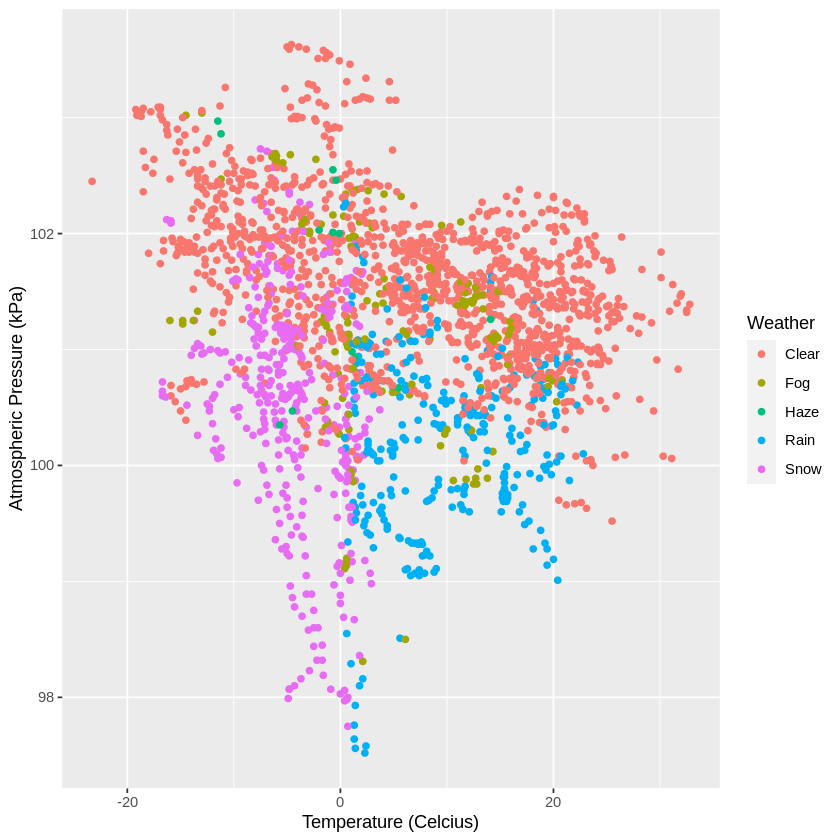

In [4]:
# INITIAL PLOT:

weather_data_plot <- weather |>
    ggplot(aes(x = temperature, y = pressure, color = weather)) +
    geom_point() +
    labs(x = "Temperature (Celcius)", y = "Atmospheric Pressure (kPa)", color = "Weather")


weather_data_plot

In [5]:
# SPlIT THE DATA INTO TRAINING AND TESTING:
# Randomly took 80% of the data in the training set. 
# This will be proportional to the different number of fruit names in the dataset.

weather_split <- initial_split(weather, prop = 0.8, strata = weather)

weather_train <- training(weather_split)

weather_test <- testing(weather_split)

In [6]:
# SUMMARIZE THE DATA INTO A TABLE BY COUNT:

weather_counts <- weather_train |>
    group_by(weather) |>
    summarize(count = n())

weather_counts

weather,count
<chr>,<int>
Clear,1062
Fog,123
Haze,13
Rain,243
Snow,308


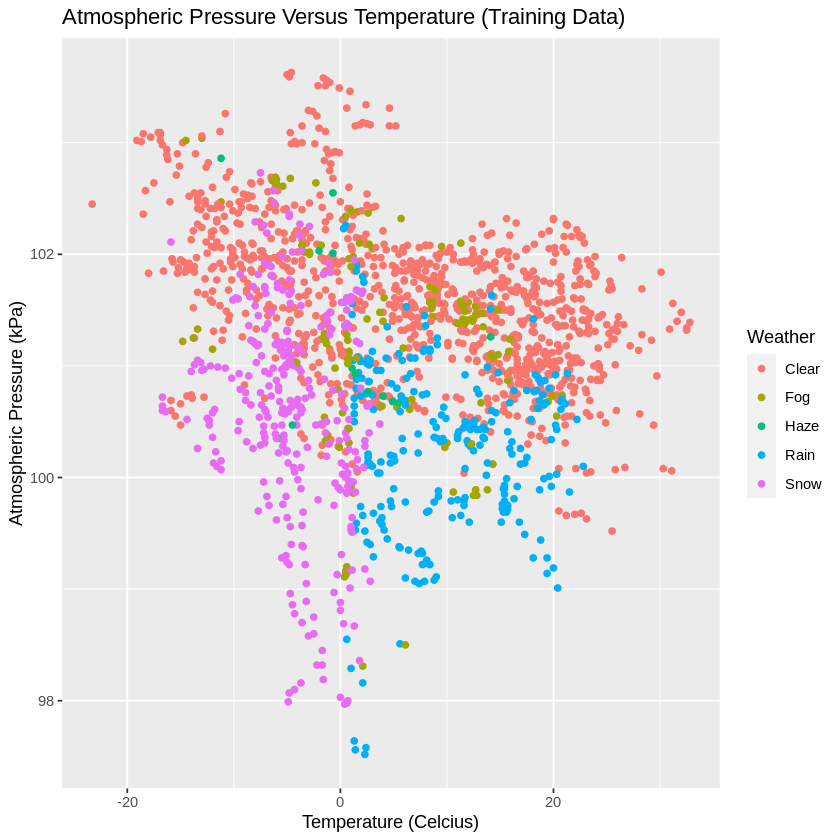

In [7]:
# VISUALIZATION OF TRAINING DATA, HIGHLIGHTING THE WEATHER CLASSES:

weather_data_plot_training <- weather_train |>
    ggplot(aes(x = temperature, y = pressure, color = weather)) +
    geom_point() +
    ggtitle("Atmospheric Pressure Versus Temperature (Training Data)") +
    labs(x = "Temperature (Celcius)", y = "Atmospheric Pressure (kPa)", color = "Weather")

weather_data_plot_training